In [9]:
import pandas as pd
import json

In [16]:
data = pd.read_csv('adaptive_lr_results.csv')
data

,model_name,train_dataset,added_gold,distant,base_model,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall
0,supervised,conll03,0.00,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.802567,0.848739,0.761159,0.808442,0.859362,0.763218,0.821640,0.861841,0.785023
1,supervised,conll03,0.05,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.809245,0.881924,0.747633,0.816412,0.894365,0.750958,0.824253,0.902434,0.758539
2,supervised,conll03,0.10,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.809722,0.854659,0.769275,0.819609,0.869547,0.775096,0.837039,0.884819,0.794155
3,supervised,conll03,0.15,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.831858,0.878222,0.790145,0.839919,0.891398,0.794061,0.854951,0.912539,0.804201
4,supervised,conll03,0.20,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.839701,0.880271,0.802705,0.849003,0.894569,0.807854,0.863105,0.906860,0.823379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,bond,conll03,0.05,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.879694,0.870132,0.889469,0.894030,0.888700,0.899425,0.896539,0.884896,0.908493
426,bond,conll03,0.10,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.882191,0.865699,0.899324,0.894240,0.881750,0.907088,0.898637,0.882954,0.914886
427,bond,conll03,0.20,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.890711,0.879307,0.902415,0.904323,0.897078,0.911686,0.913858,0.901832,0.926210
428,bond,conll03,0.30,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.895020,0.875740,0.915169,0.910375,0.895039,0.926245,0.934002,0.916198,0.952511


In [14]:
data.sort_values('dev_f1', ascending=False)

,model_name,train_dataset,added_gold,distant,base_model,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall
26,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.836812,0.840812,0.832850,0.848274,0.856473,0.840230,0.855296,0.864961,0.845845
29,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.837736,0.838953,0.836522,0.847614,0.852958,0.842337,0.853856,0.860508,0.847306
46,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.840344,0.831599,0.849275,0.852000,0.847159,0.856897,0.853745,0.848736,0.858813
36,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.842996,0.838883,0.847150,0.855857,0.855775,0.855939,0.852669,0.854939,0.850411
43,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.833493,0.828402,0.838647,0.846183,0.845052,0.847318,0.850943,0.853130,0.848767
47,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.827119,0.829126,0.825121,0.838205,0.844315,0.832184,0.850496,0.863380,0.837991
40,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.827114,0.825443,0.828792,0.838456,0.840716,0.836207,0.848212,0.853943,0.842557
41,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.830665,0.829066,0.832271,0.845917,0.848362,0.843487,0.847984,0.852919,0.843105
42,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.835879,0.836202,0.835556,0.848257,0.852691,0.843870,0.847592,0.854755,0.840548
48,bond,conll03,0.0,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.828541,0.830229,0.826860,0.840309,0.846019,0.834674,0.847392,0.858347,0.836712


In [5]:
import json
from pprint import pprint
pprint(json.loads(data['model_params'].loc[530].replace("'", '"')))

JSONDecodeError: Expecting value: line 1 column 24 (char 23)

In [15]:
# hp analysis
from pprint import pprint
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])
for name, group in grouped:
    print(name)
    best_idx = group['dev_f1'].idxmax()
    pprint(json.loads(group['model_params'].loc[best_idx].replace("'", '"').replace('False', 'false').replace('True', 'true')))
    print(group.loc[best_idx])
    print('   ')

('with_distant', 'bond')
{'adaptive_scheduler_drop': 0.5,
 'adaptive_scheduler_patience': 5,
 'batch_size': 4,
 'bert_dropout': 0.1,
 'end_updates': 1.0,
 'head_dropout': 0.3,
 'label_keep_threshold': 0.9,
 'learning_rate': 5e-05,
 'logging': 100,
 'ner_fit_epochs': 10,
 'self_training_epochs': 15,
 'self_training_lr_proportion': 0.2,
 'start_updates': 2.0,
 'use_kldiv_loss_ner': False,
 'warmup_proportion': 0.2}
model_name                                                     bond
added_gold                                                        0
distant                                                with_distant
base_model                                                     None
model_params      {'use_kldiv_loss_ner': False, 'learning_rate':...
test_f1                                                    0.836812
test_precision                                             0.840812
test_recall                                                 0.83285
corr_f1                                

In [17]:
data['kldiv_ner_loss'] = False
for idx, row in data.iterrows():
    data.loc[idx, 'kldiv_ner_loss'] = json.loads(row['model_params'].replace("'", '"').replace('False', 'false').replace('True', 'true'))['use_kldiv_loss_ner']
data

,model_name,train_dataset,added_gold,distant,base_model,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall,kldiv_ner_loss
0,supervised,conll03,0.00,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.802567,0.848739,0.761159,0.808442,0.859362,0.763218,0.821640,0.861841,0.785023,False
1,supervised,conll03,0.05,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.809245,0.881924,0.747633,0.816412,0.894365,0.750958,0.824253,0.902434,0.758539,False
2,supervised,conll03,0.10,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.809722,0.854659,0.769275,0.819609,0.869547,0.775096,0.837039,0.884819,0.794155,False
3,supervised,conll03,0.15,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.831858,0.878222,0.790145,0.839919,0.891398,0.794061,0.854951,0.912539,0.804201,False
4,supervised,conll03,0.20,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.839701,0.880271,0.802705,0.849003,0.894569,0.807854,0.863105,0.906860,0.823379,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,bond,conll03,0.05,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.879694,0.870132,0.889469,0.894030,0.888700,0.899425,0.896539,0.884896,0.908493,False
426,bond,conll03,0.10,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.882191,0.865699,0.899324,0.894240,0.881750,0.907088,0.898637,0.882954,0.914886,False
427,bond,conll03,0.20,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.890711,0.879307,0.902415,0.904323,0.897078,0.911686,0.913858,0.901832,0.926210,False
428,bond,conll03,0.30,with_distant,None,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.895020,0.875740,0.915169,0.910375,0.895039,0.926245,0.934002,0.916198,0.952511,False


In [ ]:
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])

In [18]:
stats = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name', 'added_gold', 'base_model', 'kldiv_ner_loss']).aggregate(['mean', 'median', 'std', 'count'])

In [19]:
stats

test_f1  \
                                                                     mean   
distant         model_name added_gold base_model kldiv_ner_loss             
with_distant    bond       0.00       None       False           0.816527   
                           0.05       None       False           0.872974   
                           0.10       None       False           0.885097   
                           0.15       None       False           0.885481   
                           0.20       None       False           0.892331   
...                                                                   ...   
without_distant supervised 0.50       None       False           0.904515   
                                      bond       False           0.906119   
                                                 True            0.909341   
                                      supervised False           0.906194   
                                                 True            0.909641   

                                                                           \
                                                                   median   
distant         model_name added_gold base_model kldiv_ner_loss             
with_distant    bond       0.00       None       False           0.822464   
                           0.05       None       False           0.871561   
                           0.10       None       False           0.885227   
                           0.15       None       False           0.887405   
                           0.20       None       False           0.890711   
...                                                                   ...   
without_distant supervised 0.50       None       False           0.908617   
                                      bond       False           0.906392   
                                                 True            0.910149   
                                      supervised False           0.905679   
                                                 True            0.909126   

                                                                           \
                                                                      std   
distant         model_name added_gold base_model kldiv_ner_loss             
with_distant    bond       0.00       None       False           0.009559   
                           0.05       None       False           0.004331   
                           0.10       None       False           0.007678   
                           0.15       None       False           0.006945   
                           0.20       None       False           0.010499   
...                                                                   ...   
without_distant supervised 0.50       None       False           0.009054   
                                      bond       False           0.002211   
                                                 True            0.002308   
                                      supervised False           0.006227   
                                                 True            0.002009   

                                                                       \
                                                                count   
distant         model_name added_gold base_model kldiv_ner_loss         
with_distant    bond       0.00       None       False              5   
                           0.05       None       False              5   
                           0.10       None       False              5   
                           0.15       None       False              5   
                           0.20       None       False              5   
...                                                               ...   
without_distant supervised 0.50       None       False              5   
                                      bond       False              5   
                          

In [23]:
data = data[data['kldiv_ner_loss'] == False]

In [24]:
stats = data.groupby(['distant', 'model_name', 'added_gold', 'base_model']).aggregate(['mean', 'median', 'std', 'count'])
stats

test_f1            \
                                                      mean    median   
distant         model_name added_gold base_model                       
with_distant    bond       0.00       None        0.816527  0.822464   
                           0.05       None        0.872974  0.871561   
                           0.10       None        0.885097  0.885227   
                           0.15       None        0.885481  0.887405   
                           0.20       None        0.892331  0.890711   
                           0.30       None        0.895901  0.895020   
                           0.40       None        0.902033  0.900969   
                           0.50       None        0.903617  0.902729   
                supervised 0.00       None        0.792165  0.787501   
                           0.05       None        0.801405  0.798808   
                           0.10       None        0.820925  0.820722   
                           0.15       None        0.830278  0.827628   
                           0.20       None        0.853538  0.853627   
                           0.30       None        0.874005  0.873554   
                           0.40       None        0.886811  0.888543   
                           0.50       None        0.898821  0.898957   
without_distant bond       0.05       None        0.837577  0.837803   
                                      bond        0.872423  0.871082   
                                      supervised  0.757076  0.758771   
                           0.10       None        0.886932  0.888889   
                                      bond        0.884809  0.885249   
                                      supervised  0.871128  0.875773   
                           0.15       None        0.898347  0.899113   
                                      bond        0.886859  0.889432   
                                      supervised  0.892638  0.889154   
                           0.20       None        0.894775  0.891576   
                                      bond        0.888505  0.886025   
                                      supervised  0.901072  0.901045   
                           0.30       None        0.896206  0.898851   
                                      bond        0.901489  0.902418   
                                      supervised  0.902790  0.904929   
                           0.40       None        0.908676  0.908883   
                                      bond        0.905304  0.905463   
                                      supervised  0.905645  0.906290   
                           0.50       None        0.908610  0.909813   
                                      bond        0.906119  0.906392   
                                      supervised  0.906194  0.905679   
                supervised 0.05       None        0.019975  0.019893   
                                      bond        0.872423  0.871082   
                                      supervised  0.515081  0.504225   
                           0.10       None        0.033086  0.021358   
                                      bond        0.884809  0.885249   
                                      supervised  0.871128  0.875773   
                           0.15       None        0.166842  0.166052   
                                      bond        0.886859  0.889432   
                                      supervised  0.892638  0.889154   
                           0.20       None        0.432871  0.433999   
                                      bond        0.888505  0.886025   
                                      supervised  0.901072  0.901045   
                           0.30       None        0.643393  0.640375   
                                      bond        0.901489  0.902418   
                                      supervised  0.902790  0.904929   
                           0.40       None        0.861995  0.856537   
                   

In [57]:
distant_data = data[data['distant'] == 'with_distant']
normal_data = data[data['distant'] == 'without_distant']
bond_data = data[data['model_name'] == 'bond']

bond_based_data = data[data['base_model'] == 'bond']
supervised_based_data = data[data['base_model'] == 'supervised']

without_supervised_none_data = data[(data['distant'] == 'without_distant') & (data['model_name'] != 'supervised')]

best_data = data[(((data['base_model'] == 'bond') & (data['model_name'] == 'bond')) | ((data['base_model'] == 'None') & (data['model_name'] == 'bond')) | ((data['base_model'] == 'bond') & (data['model_name'] == 'supervised'))) & (data['kldiv_ner_loss'] == False) & (data['distant'] == 'without_distant')]
best_data.to_csv('best_based_results.csv', index=False)

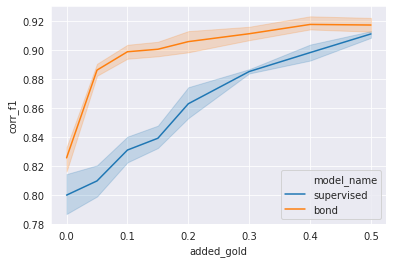

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=distant_data, x='added_gold', y='corr_f1', hue='model_name')
plt.savefig('experiments/plots/distant_f1.png', dpi=1200)

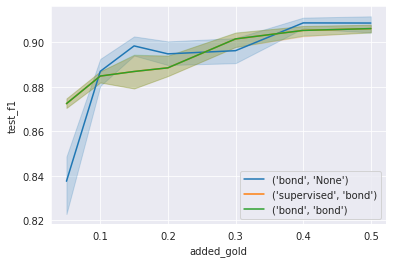

In [58]:
sns.lineplot(data=best_data, x='added_gold', y='test_f1', hue=best_data[['model_name', 'base_model']].apply(tuple, axis=1))
plt.show()

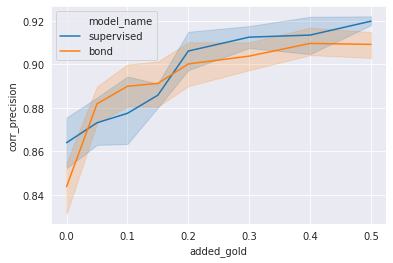

In [27]:
sns.lineplot(data=distant_data, x='added_gold', y='corr_precision', hue='model_name')
plt.savefig('experiments/plots/distant_precision.png', dpi=1200)

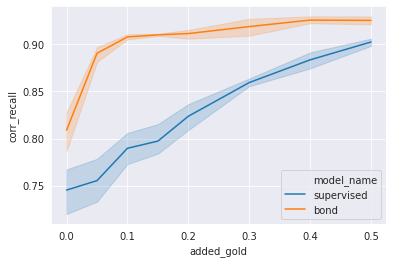

In [28]:
sns.lineplot(data=distant_data, x='added_gold', y='corr_recall', hue='model_name')
plt.savefig('experiments/plots/distant_recall.png', dpi=1200)

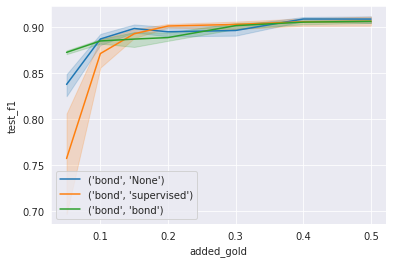

In [47]:
sns.lineplot(data=without_supervised_none_data, x='added_gold', y='test_f1', hue=without_supervised_none_data[['model_name', 'base_model']].apply(tuple, axis=1))
plt.savefig('experiments/plots/normal_f1.png', dpi=1200)

In [ ]:
sns.lineplot(data=normal_data, x='added_gold', y='corr_precision', hue=['model_name', 'base_model'])
plt.savefig('experiments/plots/normal_precision.png', dpi=1200)

In [ ]:
sns.lineplot(data=normal_data, x='added_gold', y='corr_recall', hue='model_name')
plt.savefig('experiments/plots/normal_recall.png', dpi=1200)

In [48]:
best_data = best_data.rename(columns={'distant': 'markup'})
dynet = pd.read_csv('dynet_results.csv')
dynet.columns = ['added_gold', 'test_f1', 'test_precision', 'test_recall']
for val_col in ['test_f1', 'test_precision', 'test_recall']:
    dynet[val_col] /= 100
dynet['markup'] = 'base_estimation'

In [49]:
bond_data = pd.concat([best_data, dynet], ignore_index=True)
bond_data

,model_name,train_dataset,added_gold,markup,base_model,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall,kldiv_ner_loss
0,bond,conll03,0.10,without_distant,bond,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.879153,0.892005,0.866667,0.894161,0.911788,0.877203,0.915408,0.928921,0.902283,False
1,bond,conll03,0.05,without_distant,bond,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.876281,0.876620,0.875942,0.889552,0.894288,0.884866,0.893711,0.895925,0.891507,False
2,bond,conll03,0.30,without_distant,bond,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.894860,0.901707,0.888116,0.909320,0.920841,0.898084,0.934292,0.942894,0.925845,False
3,bond,conll03,0.20,without_distant,bond,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.899213,0.904576,0.893913,0.913246,0.923258,0.903448,0.924860,0.931456,0.918356,False
4,bond,conll03,0.15,without_distant,bond,"{'use_kldiv_loss_ner': False, 'learning_rate':...",0.897242,0.901972,0.892560,0.912433,0.921799,0.903257,0.924802,0.930964,0.918721,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,0.30,base_estimation,NaN,NaN,0.885752,0.888197,0.883322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,0.20,base_estimation,NaN,NaN,0.869966,0.871667,0.868272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,0.10,base_estimation,NaN,NaN,0.819632,0.883545,0.764341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,0.15,base_estimation,NaN,NaN,0.867647,0.890276,0.846140,NaN,NaN,NaN,NaN,NaN,NaN,NaN


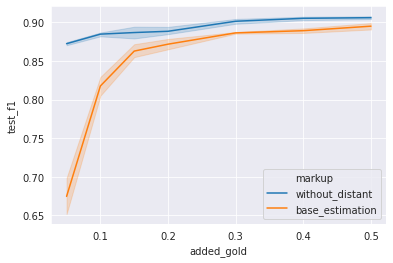

In [50]:
sns.lineplot(data=bond_data, x='added_gold', y='test_f1', hue='markup')
plt.savefig('experiments/plots/bond_f1.png', dpi=1200)

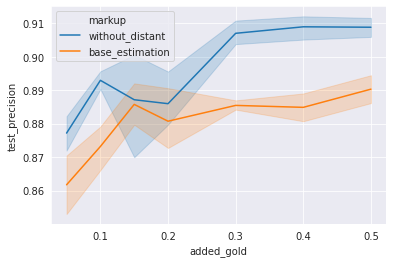

In [36]:
sns.lineplot(data=bond_data, x='added_gold', y='test_precision', hue='markup')
plt.savefig('experiments/plots/bond_precision.png', dpi=1200)

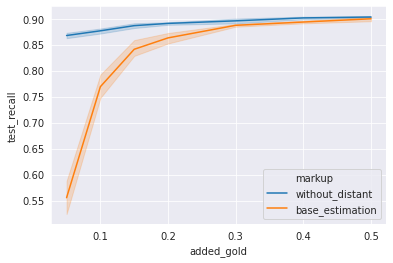

In [37]:
sns.lineplot(data=bond_data, x='added_gold', y='test_recall', hue='markup')
plt.savefig('experiments/plots/bond_recall.png', dpi=1200)

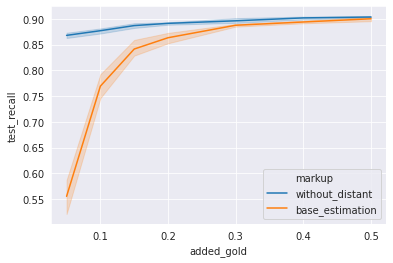

In [38]:
sns.lineplot(data=bond_data, x='added_gold', y='test_recall', hue='markup')
plt.savefig('experiments/plots/bond_recall.png', dpi=1200)

In [78]:
grouped.groups

{('None', 'bond'): [10, 11, 12, 13, 14, 15, 16, 17, 67, 70, 71, 72, 73, 74, 75, 76, 79, 80, 82, 83, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162], ('None', 'coregularized'): [46, 47, 48, 49, 50, 51, 52, 53, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], ('None', 'supervised'): [38, 39, 40, 41, 42, 43, 44, 45, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120], ('distant', 'bond'): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], ('distant', 'coregularized'): [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 110, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], ('distant', 'supervised'): [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 77, 78, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 1